# Basis pursuit

$$
J = ||x||_1 s.t. Ax=b
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylops
import pyproximal

In [5]:
n, m = 100, 40
nava = 10

x = np.zeros(100)
iava = np.random.permutation(np.arange(n))[:nava]
x[iava] = np.random.normal(0, 1, nava)

In [6]:
A = np.random.normal(0, 1, (m, n))
Aop = pylops.MatrixMult(A)
b = Aop * x

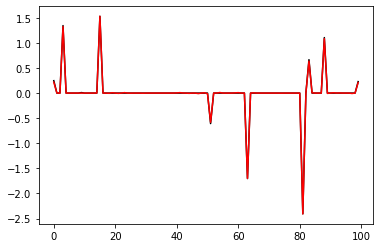

In [17]:
f = pyproximal.AffineSet(Aop, b, 20)
g = pyproximal.L1()

xinv = pyproximal.optimization.primal.ADMM(f, g, np.zeros_like(x), 0.1, niter=200)[0]

plt.figure()
plt.plot(x, 'k')
plt.plot(xinv, 'r')